<h1 style="padding:40px;text-align:center;font-family:Arial;color:azure;background-color:DarkCyan"><br>KRANKENHÄUSER BEWERTUNGEN SENTIMENT ANALYSE<br></h1>

<h2 style="font-family:tahoma">The Data</h2>

In [1]:
#!pip install -U textblob-de==0.4.3
#nltk.download('punkt')

In [2]:
import textblob
import pandas as pd
import numpy as np
from textblob_de import TextBlobDE
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [3]:
df = pd.read_csv("klinikbew.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NameKlinik           3354 non-null   object
 1   Titel                3352 non-null   object
 2   DatumBewertung       3354 non-null   object
 3   Fachbereich          3350 non-null   object
 4   Erfahrungsbericht    3310 non-null   object
 5   Gesamtzufriedenheit  3354 non-null   object
 6   QualitätBeratung     3354 non-null   object
 7   MedizBehandlung      3354 non-null   object
 8   VerwaltungAblaeufe   3354 non-null   object
dtypes: object(9)
memory usage: 236.0+ KB


In [5]:
df.head()

,NameKlinik,Titel,DatumBewertung,Fachbereich,Erfahrungsbericht,Gesamtzufriedenheit,QualitätBeratung,MedizBehandlung,VerwaltungAblaeufe
0,HEH Herzogin Elisabeth Hospital,Bewertung,09.06.2021,Chirurgie,Sehr höfliche und hilfsbereite Mitarbeiter.\n\...,star-6,star-6,star-6,star-6
1,HEH Herzogin Elisabeth Hospital,Weiter so HEH,09.06.2021,Chirurgie,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,star-6,star-4,star-6,star-4
2,HEH Herzogin Elisabeth Hospital,Superklinik,07.06.2021,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,star-6,star-6,star-6,star-6
3,HEH Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,25.05.2021,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,star-6,star-6,star-6,star-6
4,HEH Herzogin Elisabeth Hospital,Knie OP,11.05.2021,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,star-6,star-6,star-6,star-6


<h1 style="text-align:center;font-family:tahoma;color:azure;background-color:DarkCyan"><br>REINIGUNG<br></h1>


<h2 style="font-family:tahoma">Missing Data</h2>

In [6]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])

print('Percentage of missing values of the columns:')

missing_data

Percentage of missing values of the columns:


,Count,Percentage
Erfahrungsbericht,44,1.311866
Fachbereich,4,0.119261
Titel,2,0.059630
NameKlinik,0,0.000000
DatumBewertung,0,0.000000
Gesamtzufriedenheit,0,0.000000
QualitätBeratung,0,0.000000
MedizBehandlung,0,0.000000
VerwaltungAblaeufe,0,0.000000


<h2 style="font-family:tahoma">Drop fehlende Daten</h2>

Da die fehlenden Daten zu gering sind, um die Analyse zu beeinflussen, ist es sinnvoll, sie einfach zu löschen.


In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304 entries, 0 to 3353
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NameKlinik           3304 non-null   object
 1   Titel                3304 non-null   object
 2   DatumBewertung       3304 non-null   object
 3   Fachbereich          3304 non-null   object
 4   Erfahrungsbericht    3304 non-null   object
 5   Gesamtzufriedenheit  3304 non-null   object
 6   QualitätBeratung     3304 non-null   object
 7   MedizBehandlung      3304 non-null   object
 8   VerwaltungAblaeufe   3304 non-null   object
dtypes: object(9)
memory usage: 258.1+ KB


<h2 style="font-family:tahoma">Duplikate</h2>

In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304 entries, 0 to 3353
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NameKlinik           3304 non-null   object
 1   Titel                3304 non-null   object
 2   DatumBewertung       3304 non-null   object
 3   Fachbereich          3304 non-null   object
 4   Erfahrungsbericht    3304 non-null   object
 5   Gesamtzufriedenheit  3304 non-null   object
 6   QualitätBeratung     3304 non-null   object
 7   MedizBehandlung      3304 non-null   object
 8   VerwaltungAblaeufe   3304 non-null   object
dtypes: object(9)
memory usage: 258.1+ KB


<h2 style="font-family:tahoma">Zeilensprung</h2>


In [11]:
df = df.replace('\n',' ', regex=True)

In [12]:
df.head()

,NameKlinik,Titel,DatumBewertung,Fachbereich,Erfahrungsbericht,Gesamtzufriedenheit,QualitätBeratung,MedizBehandlung,VerwaltungAblaeufe
0,HEH Herzogin Elisabeth Hospital,Bewertung,09.06.2021,Chirurgie,Sehr höfliche und hilfsbereite Mitarbeiter. S...,star-6,star-6,star-6,star-6
1,HEH Herzogin Elisabeth Hospital,Weiter so HEH,09.06.2021,Chirurgie,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,star-6,star-4,star-6,star-4
2,HEH Herzogin Elisabeth Hospital,Superklinik,07.06.2021,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,star-6,star-6,star-6,star-6
3,HEH Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,25.05.2021,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,star-6,star-6,star-6,star-6
4,HEH Herzogin Elisabeth Hospital,Knie OP,11.05.2021,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,star-6,star-6,star-6,star-6


In [13]:
print(df['Erfahrungsbericht'][1299])

Unsere 14 Jährige Tochter kam teilstationär auf Station 59 der Kinder -Jugend-Psych.Abteilung der Ameos Hildesheim zur Behandlung von Trauma und Depression ( Mobbing u körperliche Übergriffe in der Schule durch Mitschüler) , Personal , angefangen von den Betreuern , Therapeuten und Ärzte absolut kompetent und feinfühlig , haben unserer Tochter sehr gut geholfen , uns ganz wichtige Infos und Tips gegeben für den Umgang mit unserer Tochter Die teilstationäre Station 59 ist sehr nett ausgestattet, Kinder und Jugendgerecht dekoriert mit einem schönen garten .  Können die Klinik absolut empfehlen


<h2 style="font-family:tahoma">STERNE</h2>

Bewertungen wurden als Texte angegeben, sie sollten in Sternzahlen umgewandelt werden


In [14]:
df['Gesamt'] = df['Gesamtzufriedenheit'].str.split('-').str[1]
df['QualBeratung'] = df['QualitätBeratung'].str.split('-').str[1]
df['MedBehandlung'] = df['MedizBehandlung'].str.split('-').str[1]
df['VerwalAblaeufe'] = df['VerwaltungAblaeufe'].str.split('-').str[1]

<h2 style="font-family:tahoma">Normalisierung</h2>

Google maps hat "1" bis "5" Sternesystem während KB "0" bis "6" hat. Wir benötigen eine mathematische Formel, um die Bewertungssterne von klinikbewertungen.de so umzurechnen, dass sie im gleichen Wertebereich wie bei Google Maps liegen würden

In [15]:
coeff = 2/3
def starAdjust(num):
    num_adjusted = 1 + num * coeff
    return num_adjusted

In [16]:
df['Gesamt'] = pd.to_numeric(df['Gesamt']).apply(starAdjust)
df['QualBeratung'] = pd.to_numeric(df['QualBeratung']).apply(starAdjust)
df['MedBehandlung'] = pd.to_numeric(df['MedBehandlung']).apply(starAdjust)
df['VerwalAblaeufe'] = pd.to_numeric(df['VerwalAblaeufe']).apply(starAdjust)

In [17]:
df = df[['NameKlinik', 'Erfahrungsbericht','Gesamt', 'QualBeratung', 'MedBehandlung', 'VerwalAblaeufe']].round(1)

In [18]:
df.head(10)

,NameKlinik,Erfahrungsbericht,Gesamt,QualBeratung,MedBehandlung,VerwalAblaeufe
0,HEH Herzogin Elisabeth Hospital,Sehr höfliche und hilfsbereite Mitarbeiter. S...,5.0,5.0,5.0,5.0
1,HEH Herzogin Elisabeth Hospital,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,5.0,3.7,5.0,3.7
2,HEH Herzogin Elisabeth Hospital,Bestens durchorganisiert.gutes Personal geht i...,5.0,5.0,5.0,5.0
3,HEH Herzogin Elisabeth Hospital,Bin nach einem Autounfall im HEH gewesen und h...,5.0,5.0,5.0,5.0
4,HEH Herzogin Elisabeth Hospital,Wurde bereits im Sept. 2020 am Knie operiert. ...,5.0,5.0,5.0,5.0
5,HEH Herzogin Elisabeth Hospital,Da ich zeit meines Lebens noch nie einen Krank...,5.0,5.0,5.0,3.7
6,HEH Herzogin Elisabeth Hospital,Das gesamte Personal von der Notaufnahme über ...,5.0,5.0,5.0,5.0
7,HEH Herzogin Elisabeth Hospital,Seit über 10 Jahren lebe ich mit Symptomen und...,5.0,5.0,5.0,5.0
8,HEH Herzogin Elisabeth Hospital,Ich war in der Notaufnahme hatte Todes Schmerz...,1.0,1.0,1.0,1.0
9,HEH Herzogin Elisabeth Hospital,Eine absolut Superklinik.Habe eine neue Hüfte ...,5.0,5.0,5.0,5.0


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gesamt,3304.0,3.436713,1.755101,1.0,1.0,3.7,5.0,5.0
QualBeratung,3304.0,3.535896,1.666333,1.0,2.3,3.7,5.0,5.0
MedBehandlung,3304.0,3.630902,1.672270,1.0,2.3,5.0,5.0,5.0
VerwalAblaeufe,3304.0,3.387772,1.571409,1.0,2.3,3.7,5.0,5.0


In [20]:
np.unique(df['Gesamt'], axis=0)

array([1. , 2.3, 3.7, 5. ])

<h2 style="font-family:tahoma">positiv - negativ</h2>

Für unsere Analysen benötigen wir die Aufteilung der Bewertungen in zwei Kategorien; positiv und negativ.


In [413]:
def starConverter(num):
    if int(num) > 3:
        happiness = 'pos'
    else:
        happiness = 'neg'
    return happiness

In [21]:
# df['Zufriedenheit'] = df['Gesamt'].apply(starConverter)

In [22]:
df['Zufriedenheit'] = np.where(df['Gesamt'] > 3, 'pos', 'neg')

In [23]:
df.head()

,NameKlinik,Erfahrungsbericht,Gesamt,QualBeratung,MedBehandlung,VerwalAblaeufe,Zufriedenheit
0,HEH Herzogin Elisabeth Hospital,Sehr höfliche und hilfsbereite Mitarbeiter. S...,5.0,5.0,5.0,5.0,pos
1,HEH Herzogin Elisabeth Hospital,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,5.0,3.7,5.0,3.7,pos
2,HEH Herzogin Elisabeth Hospital,Bestens durchorganisiert.gutes Personal geht i...,5.0,5.0,5.0,5.0,pos
3,HEH Herzogin Elisabeth Hospital,Bin nach einem Autounfall im HEH gewesen und h...,5.0,5.0,5.0,5.0,pos
4,HEH Herzogin Elisabeth Hospital,Wurde bereits im Sept. 2020 am Knie operiert. ...,5.0,5.0,5.0,5.0,pos


In [24]:
df['ist_zufrieden'] = np.where(df['Zufriedenheit']=='pos', 1, 0)

In [25]:
df.head()

,NameKlinik,Erfahrungsbericht,Gesamt,QualBeratung,MedBehandlung,VerwalAblaeufe,Zufriedenheit,ist_zufrieden
0,HEH Herzogin Elisabeth Hospital,Sehr höfliche und hilfsbereite Mitarbeiter. S...,5.0,5.0,5.0,5.0,pos,1
1,HEH Herzogin Elisabeth Hospital,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,5.0,3.7,5.0,3.7,pos,1
2,HEH Herzogin Elisabeth Hospital,Bestens durchorganisiert.gutes Personal geht i...,5.0,5.0,5.0,5.0,pos,1
3,HEH Herzogin Elisabeth Hospital,Bin nach einem Autounfall im HEH gewesen und h...,5.0,5.0,5.0,5.0,pos,1
4,HEH Herzogin Elisabeth Hospital,Wurde bereits im Sept. 2020 am Knie operiert. ...,5.0,5.0,5.0,5.0,pos,1


<h2 style="font-family:tahoma">Groupby</h2>

In [26]:
df['NameKlinik'].value_counts()

Diana Klinik-Fachklinik für Physikalische Medizin      326
Agaplesion - Diakonieklinikum Rotenburg                297
DIAKOVERE Henriettenstift                              241
Klinikum Wolfsburg                                     232
Klinik Fallingbostel                                   205
MediClin Klinikum Soltau                               186
AMEOS Klinikum Hildesheim                              171
Klinikum Peine gGmbH                                   145
AMEOS Klinikum Seepark Geestland                       144
HEH Herzogin Elisabeth Hospital                        130
HELIOS Klinik Cuxhaven                                 125
Helios Kliniken Mittelweser - Krankenhaus Nienburg     124
Kreiskrankenhaus Buchholz                              123
KRH Klinikum Agness Karll Laatzen                      118
Klinikum Wahrendorff                                   105
Heidekreis-Klinikum GmbH - Krankenhaus Walsrode        104
Kreiskrankenhaus Winsen                                 

In [27]:
kb_stars = df[['NameKlinik', 'Gesamt', 'Zufriedenheit']]

In [28]:
kb_stars

,NameKlinik,Gesamt,Zufriedenheit
0,HEH Herzogin Elisabeth Hospital,5.0,pos
1,HEH Herzogin Elisabeth Hospital,5.0,pos
2,HEH Herzogin Elisabeth Hospital,5.0,pos
3,HEH Herzogin Elisabeth Hospital,5.0,pos
4,HEH Herzogin Elisabeth Hospital,5.0,pos
...,...,...,...
3349,Diana Klinik-Fachklinik für Physikalische Medizin,5.0,pos
3350,Diana Klinik-Fachklinik für Physikalische Medizin,5.0,pos
3351,Diana Klinik-Fachklinik für Physikalische Medizin,1.0,neg
3352,Diana Klinik-Fachklinik für Physikalische Medizin,1.0,neg


In [29]:
kb_means = kb_stars.groupby(['NameKlinik'], as_index=False)['Gesamt'].mean()

In [30]:
#kb_means = kb_stars[['NameKlinik', 'Gesamt', 'Zufriedenheit']]

In [31]:
kb_means = kb_means.sort_values(by='Gesamt', ascending=False)

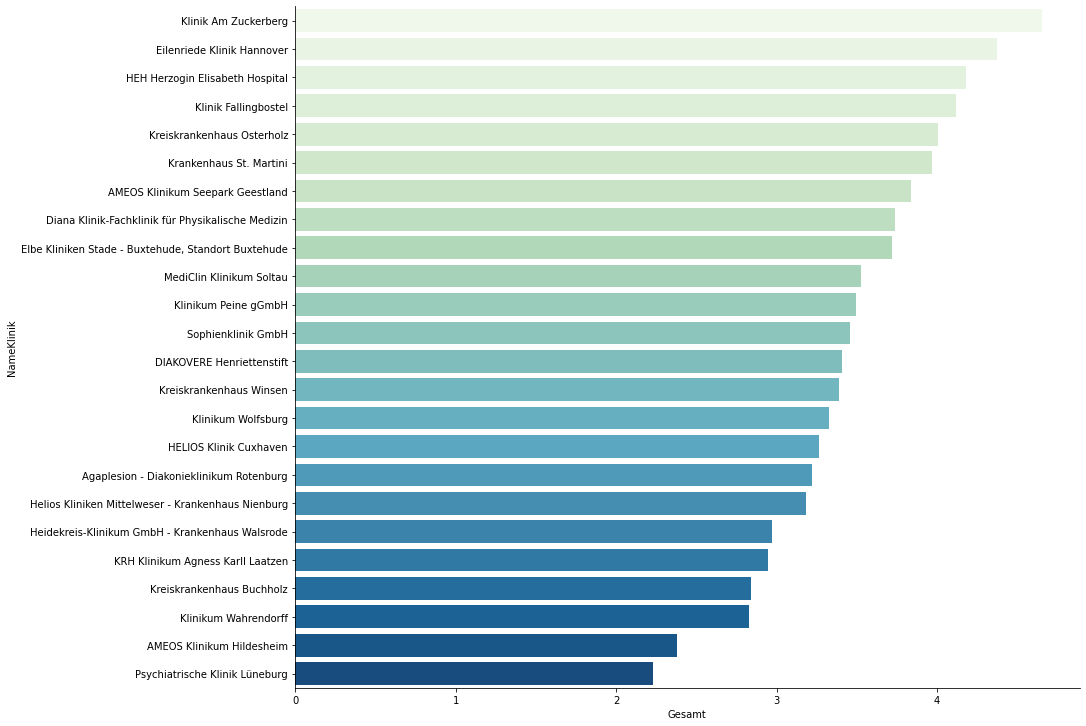

In [32]:
kb_means = kb_means.sort_values('Gesamt',ascending=False)
sns.catplot(x="Gesamt",y="NameKlinik",data = kb_means, kind="bar", height=10, aspect=1.5, palette='GnBu')
plt.savefig('kliniks.png', format='png')

<h1 style="text-align:center;font-family:tahoma;color:azure;background-color:DarkCyan"><br>TextBlob KLASIFIKATION<br></h1>


In [244]:
reviews = [str(a) for a in df['Erfahrungsbericht']]
resultPolarity = []

In [245]:
for review in reviews:
    bewertungen = TextBlobDE(review)
    resultPolarity.append(bewertungen.polarity)

In [246]:
len(resultPolarity)

3304

In [247]:
resultPolarity

[0.4625,
 0.0,
 0.0,
 0.33999999999999997,
 0.24285714285714285,
 0.5361111111111111,
 0.42857142857142855,
 0.5233333333333333,
 -0.575,
 0.5,
 1.0,
 0.3333333333333333,
 0.2,
 0.6666666666666666,
 1.0,
 -0.3333333333333333,
 0.3333333333333333,
 0.46153846153846156,
 0.6666666666666666,
 0.022222222222222216,
 0.12272727272727274,
 0.3,
 0.925,
 0.6666666666666666,
 0.5,
 0.3717391304347826,
 0.5,
 0.14999999999999997,
 0.3375,
 0.03235294117647058,
 0.2852941176470588,
 1.0,
 1.0,
 0.8285714285714286,
 0.20555555555555557,
 0.6291666666666668,
 0.3333333333333333,
 0.12142857142857143,
 0.5571428571428572,
 -0.3,
 0.5,
 1.0,
 0.39621212121212124,
 -0.5,
 0.378125,
 0.35625,
 0.27999999999999997,
 0.5666666666666667,
 0.07777777777777778,
 0.17352941176470585,
 0.5,
 0.11499999999999999,
 0.0,
 0.7999999999999999,
 0.44333333333333325,
 0.4444444444444444,
 0.13999999999999999,
 0.2833333333333333,
 -0.0625,
 0.01666666666666667,
 0.17142857142857143,
 0.3333333333333333,
 0.85,
 0.1

In [248]:
df['Polarity Level'] = resultPolarity

In [249]:
df['Polarity Stimmung'] = np.where(df['Polarity Level'] > 0, 'pos', 'neg')

In [250]:
df.round(2).head(300)

,NameKlinik,Erfahrungsbericht,Gesamt,QualBeratung,MedBehandlung,VerwalAblaeufe,Zufriedenheit,ist_zufrieden,Polarity Level,Polarity Stimmung
0,HEH Herzogin Elisabeth Hospital,Sehr höfliche und hilfsbereite Mitarbeiter. S...,5.0,5.0,5.0,5.0,pos,1,0.46,pos
1,HEH Herzogin Elisabeth Hospital,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,5.0,3.7,5.0,3.7,pos,1,0.00,neg
2,HEH Herzogin Elisabeth Hospital,Bestens durchorganisiert.gutes Personal geht i...,5.0,5.0,5.0,5.0,pos,1,0.00,neg
3,HEH Herzogin Elisabeth Hospital,Bin nach einem Autounfall im HEH gewesen und h...,5.0,5.0,5.0,5.0,pos,1,0.34,pos
4,HEH Herzogin Elisabeth Hospital,Wurde bereits im Sept. 2020 am Knie operiert. ...,5.0,5.0,5.0,5.0,pos,1,0.24,pos
...,...,...,...,...,...,...,...,...,...,...
301,Klinikum Wolfsburg,Ich kam nach einem Sturz und starken Schmerzen...,1.0,1.0,1.0,2.3,neg,0,0.08,pos
302,Klinikum Wolfsburg,Im Juli 2016 stand eine Nasenscheidewandoperat...,5.0,5.0,5.0,2.3,pos,1,0.32,pos
303,Klinikum Wolfsburg,Noch nie habe ich so positive Erfahrungen gema...,5.0,5.0,5.0,5.0,pos,1,0.42,pos
304,Klinikum Wolfsburg,Bin mit vorzeitigen Wehen ins KH gekommen 31.s...,2.3,2.3,1.0,3.7,neg,0,-0.02,neg


In [251]:
final_df = df.groupby(['NameKlinik'])['Polarity Level'].mean()

In [252]:
final_df.sort_values(ascending=False)

NameKlinik
Eilenriede Klinik Hannover                             0.423636
Klinik Am Zuckerberg                                   0.403131
Kreiskrankenhaus Osterholz                             0.393808
Krankenhaus St. Martini                                0.386107
Klinik Fallingbostel                                   0.383856
HEH Herzogin Elisabeth Hospital                        0.354191
Elbe Kliniken Stade - Buxtehude, Standort Buxtehude    0.321394
Diana Klinik-Fachklinik für Physikalische Medizin      0.280195
Agaplesion - Diakonieklinikum Rotenburg                0.259451
Sophienklinik GmbH                                     0.258206
Klinikum Peine gGmbH                                   0.252402
AMEOS Klinikum Seepark Geestland                       0.250936
Helios Kliniken Mittelweser - Krankenhaus Nienburg     0.250302
HELIOS Klinik Cuxhaven                                 0.240655
MediClin Klinikum Soltau                               0.232014
DIAKOVERE Henriettenstift    

In [253]:
df.to_csv('kbClean.csv', index=False)

In [190]:
#df_kliniks_mean=df_kliniks_mean.sort_values('Polaritiy')
#sns.catplot(x="Polaritiy",y="Name der Klinik",data=df_kliniks_mean,kind="bar",height=10)

<h1 style="text-align:center;font-family:tahoma;color:azure;background-color:DarkCyan"><br>ML-MODELL<br></h1>

<h2 style="font-family:tahoma">Verteilung</h2>

In [210]:
### Checking for the Distribution of Default ###
verteilung= df.groupby('NameKlinik').Zufriedenheit.value_counts(normalize=True)*100
verteilung_df = verteilung.to_frame()
print(round(verteilung_df,2))

                                                                  Zufriedenheit
NameKlinik                                         Zufriedenheit               
AMEOS Klinikum Hildesheim                          neg                    63.74
                                                   pos                    36.26
AMEOS Klinikum Seepark Geestland                   pos                    73.61
                                                   neg                    26.39
Agaplesion - Diakonieklinikum Rotenburg            pos                    55.56
                                                   neg                    44.44
DIAKOVERE Henriettenstift                          pos                    60.17
                                                   neg                    39.83
Diana Klinik-Fachklinik für Physikalische Medizin  pos                    73.31
                                                   neg                    26.69
Eilenriede Klinik Hannover              

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

Independent_var = df.Erfahrungsbericht
Dependent_var = df.Zufriedenheit

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.2, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 2643
IV_test  : 661
DV_train : 2643
DV_test  : 661


In [195]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

In [196]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[224,  25],
       [ 31, 381]])

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.9152798789712556
Precision :  0.9158244381794661
Recall :  0.9152798789712556


In [198]:
example = ["Augenscheinlich braucht diese Klinik in Corona-Zeiten Geld und tut alles, um dieses von den Krankenkassen zu bekommen!Patientin war meine 3 Monate alte Tochter. Es handelte sich um eine geplante Operation, die durchaus auch als ambulante OP vorgenommen wird. Den Grund, warum die stationäre Aufnahme notwendig war, konnte mir niemand erläutern!Bei der vorstationären Aufnahme wurde ich daraufhingewiesen, dass ich Windeln und Nahrung für mein Kind selbst mitzubringen hätte. Das Nahrung mitzubringen ist, konnte ich nachvollziehen, da es hier sehr viele verschiedene Angebote gibt und die Klinik unmöglich alle Sorten vorhalten kann! Aber Windeln? Das ist für eine Klinik mit Kinderorthopädie als Fachrichtung nicht nachvollziehbar!Das Zimmer war ein normales Doppelzimmer mit einem Gitterbettchen für meine Tochter und einem Krankenbett für mich. Im Zimmer gab es weder einen Wickelplatz noch Feuchttücher bzw. einen Windeleimer o. Ä. Wickelzubehör!Mehrere Ärzte bzw. Schwestern kannten, trotz Krankenakte in ihren Händen, nicht einmal das Geschlecht meiner Tochter.Nach der OP übten sich die Schwestern auf der Station in vornehmer Zurückhaltung! Niemand interessierte sich für den Gesundheitszustand meiner Tochter! Die verordneten Schmerzmittel wurden 1,5 Stunden zu spät gebracht und interessiert, ob ich diese meiner Tochter gebe oder nicht hat es niemanden!Am Entlassungstag sprachen die meist sehr unfreundlichen Stationsschwestern von einem Verbandswechsel, der absolut nicht notwendig und für die Behandlung meiner Tochter auch nicht vorgesehen war.Die Entlassungspapiere und der Arztbrief für den behandelnden Orthopäden wurden vor der Entlassungsvisite fertig gemacht, obwohl im Arztbrief das Ergebnis der Entlassungsvisite steht! Scheinbar kann in der Klinik jemand hellsehen."]
result = model.predict(example)

print(result)

['neg']
